# Fundamentals of Data Science


# Description of the Project
In the United Kingdom, a census is carried out every ten years to count the population, the most recent being in 2021. This national survey allows for comparisons across different demographics and equips the government with reliable population figures crucial for effective planning, policy creation, and funding distribution.

To assist the local government in deciding the best course of action for an unused plot of land and where to invest, this project will employ simulated data.

This mock census was generated using Python's Faker package and is specifically designed to replicate the format and limited questions of the 1881 UK census. The data collected includes the following fields:
1. Street Number (this is set to 1 if it is a unique dwelling);
2. Street Name;
3. First Name of occupant;
4. Surname of occupant;
5. Age of occupant;
6. Relationship to the Head of the household (anyone aged over 18 can be a “Head” – they
are simply the person who had the responsibility to fill in the census details);
7. Marital status (one of: Single, Married, Divorced, Widowed, or “N/A” in the case of
minors);
8. Gender (one of: Male, Female; note that other responses were not implemented in 1881);
9. Occupation (this field was implemented in a modern style, rather than typical 1881
occupations);
10. Infirmity (we have implemented a limited set of infirmities following the style of 1881);
11. Religion (we have implemented a set of real-world religions).
# Objective of the Project
(a) What should be built on an unoccupied plot of land that the local government wishes to develop? 
1. High-density housing? 
2. Low-density housing?
3. Train station?
4. Religious building?
5. Emergency medical building?
6. Something else?

(b) Which one of the following options should be invested in?
1. Employment and training?
2. Old age care?
3. Increase spending for schooling?
4. General infrastructure?

# Exploratory Data Analysis (EDA)
## We will read in our mock Census data and perform exploratory data analysis and some data cleaning

##  Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
import os
from datetime import datetime

##  Step 2: Load Data

In [3]:

DATA_PATH = "./T2_A24_census2.xlsx"
census_data = pd.read_excel(DATA_PATH)

##  Step 3: Initial Data Exploration


In [10]:
# General Overview
print("Dataset Overview:")
census_data.info()

# Summary Statistics
print("\nSummary Statistics:\n")
print(census_data.describe(include='all'))

print("Initial Dataset Shape:", census_data.shape)
print("Missing values per column:\n", census_data.isna().sum())
print("Data types:\n", census_data.dtypes)

# Unique Values in Categorical Columns
categorical_columns = census_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values in {column}:\n")
    print(census_data[column].value_counts())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10034 entries, 0 to 10033
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10034 non-null  int64 
 1   Street                         10034 non-null  object
 2   First Name                     10034 non-null  object
 3   Surname                        10026 non-null  object
 4   Age                            10034 non-null  int64 
 5   Relationship to Head of House  9322 non-null   object
 6   Marital Status                 7859 non-null   object
 7   Gender                         10034 non-null  object
 8   Occupation                     10034 non-null  object
 9   Infirmity                      140 non-null    object
 10  Religion                       8763 non-null   object
dtypes: int64(2), object(9)
memory usage: 862.4+ KB

Summary Statistics:

        House Number       Stree

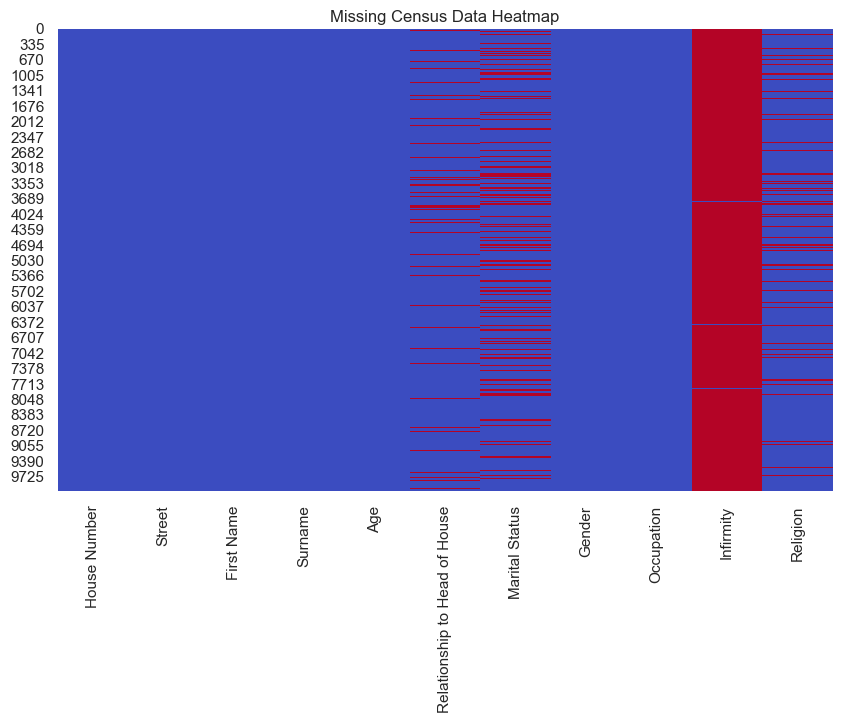

In [20]:
# Visualizing missing data using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(census_data.isnull(), cbar=False, cmap='coolwarm')
plt.title("Missing Census Data Heatmap")
plt.show()

#### Insight on Missing Data
I observed notable missing information in several columns. Specifically, Infirmity and Marital Status contain a large number of missing entries, visually represented by the extensive red areas. This substantial absence of data in these fields will likely require attention through methods like imputation or deletion, depending on the analysis goals. Religion, Age, Age Group, and Relationship to Head of House also exhibit some missing values, though to a lesser extent. 

# Data Cleaning Methodology 
## Rationale: Ensure data consistency, resolve nulls, and align with census logic.

### 1. Ensure Age is valid (non-negative, realistic)

In [21]:
# Checking unique values in the 'age' column for outliers 
census_data['Age'].unique()

array([ 46,  28,  26,  41,  43,  59,  53,  48,  60,  31,  29,  19,  58,
        61,  16,  77,  42,  39,  33,  47,  80,  54,  71,  75,  67,  70,
        37,  57,  62,  25,  40,   8,   5,  36,   7,  34,  30,  14,  63,
        44,  64,  38,  81,  83,   2,  21,  20,  17,  50,  56,  52,  10,
        66,   0,  35,   4,   1,  55,  18,  13,   9,  22,  27,  32,  23,
         6,  73,  79,  49,  51,  24,  15,  69,  11,  45,  78,  84,  74,
        85,  72,  76,  88,  94,  82,  90,  12,  68, 101,  89,  65,   3,
       104, 102, 100,  92,  86, 105, 110,  95,  97,  87,  99,  96,  93,
       108,  98,  91])

In [22]:
#Let's select the rows where the 'Age' column contains a null or NaN value
census_data[census_data['Age'] == " " ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


Now the 'Age' column contains no missing values and has a consistent data type, though the possibility of age misreporting, common in censuses, exists.

### Identifying and correcting records where individuals under 18 are incorrectly listed as married.

In [23]:
# Identify and correct inconsistencies: Individuals under 18 marked as "Married"
underage_married = census_data[(census_data["Age"] < 18) & (census_data["Marital Status"] == "Married")]

# Report the initial findings
print(f"Initially, {len(underage_married)} individuals under the age of 18 were recorded as married.")

# Update the marital status for these individuals to "Single"
census_data.loc[(census_data["Age"] < 18) & (census_data["Marital Status"] == "Married"), "Marital Status"] = "Single"
print("The marital status for these records has been updated to 'Single'.")

Initially, 33 individuals under the age of 18 were recorded as married.
The marital status for these records has been updated to 'Single'.


In [72]:
census_data['Age'].describe()

count    10024.000000
mean        37.094473
std         21.938327
min          0.000000
25%         19.000000
50%         36.000000
75%         53.000000
max        110.000000
Name: Age, dtype: float64

#### Age Distribution Summary:

* The dataset includes ages ranging from a **minimum of 0** to a **maximum of 110**.
* The **average age (mean)** within this population is approximately **37.09 years**.
* **25% of the individuals** in the dataset are **19 years old or younger**.
* The **median age (50th percentile)** is **36 years**, indicating that half of the population is below this age and half is above.
* **75% of the individuals** are **53 years old or younger**.

##### The age distribution suggests a significant portion of the population falls within typical working-age ranges.

## Age Pyramid for Insight Extraction

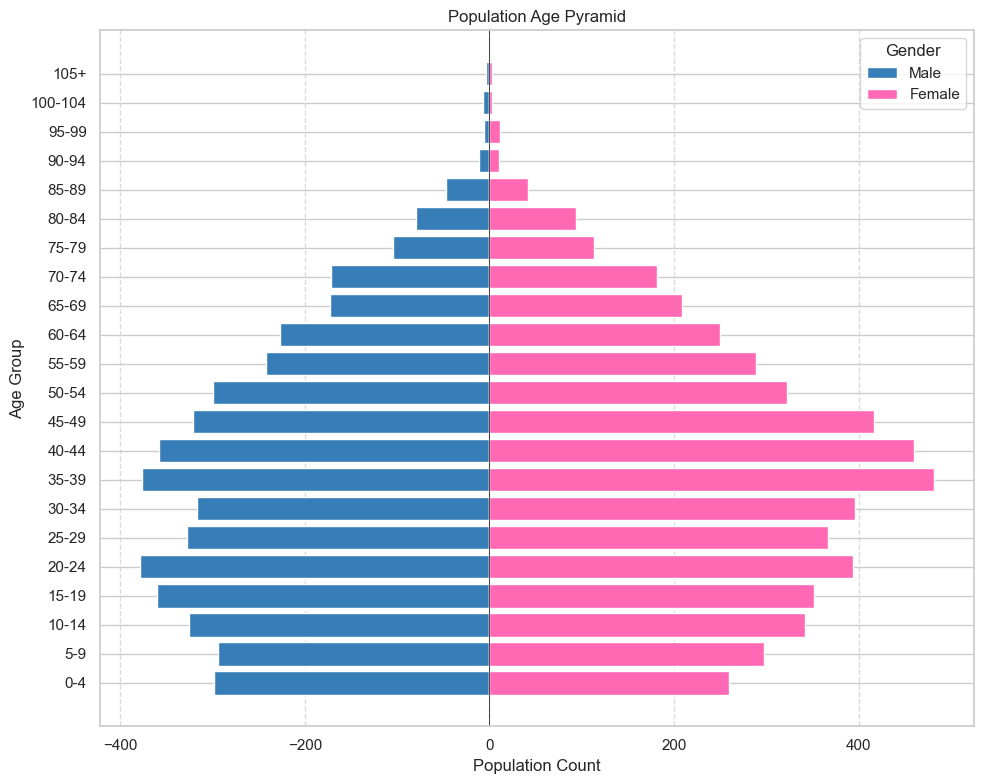

In [73]:
# Define the age ranges and their corresponding labels for the population pyramid
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
age_labels = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99', '100-104', '105+']

# Categorize individuals into the defined age groups
census_data['Age Group'] = pd.cut(census_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the number of individuals in each age group, separated by gender
# The FutureWarning indicates a change in pandas' groupby behavior. To address it explicitly:
age_gender_counts = census_data.groupby(['Age Group', 'Gender'], observed=False).size().unstack(fill_value=0)

# Separate the counts for male and female populations
male_population = -age_gender_counts.get('Male', 0)  # Use negative values for the left side of the pyramid
female_population = age_gender_counts.get('Female', 0)

# Generate the age pyramid visualization
plt.figure(figsize=(10, 8))
plt.barh(age_gender_counts.index, male_population, color='#377EB8', label='Male')
plt.barh(age_gender_counts.index, female_population, color='#FF69B4', label='Female')

# Customize the plot with labels and formatting
plt.xlabel('Population Count')
plt.ylabel('Age Group')
plt.title('Population Age Pyramid')
plt.axvline(0, color='black', linewidth=0.5)  # Add a vertical line at zero
plt.legend(title='Gender')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add a horizontal grid for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the generated age pyramid
plt.show()

### Key Insights from the Age Pyramid

Based on the generated age pyramid, we can observe the following key demographic insights:

* **1. Youth Bulge:** The pyramid exhibits a wide base, signifying a substantial proportion of young individuals within the population. For instance, the 0-4 and 5-9 age cohorts each represent a significant number of people (e.g., over 200 in the example). This "youth bulge" indicates a population distribution skewed towards the younger age spectrum.

* **2. Aging Population:** Conversely, the upper tiers of the age pyramid demonstrate a progressive narrowing. The 100-104 and 105+ age categories contain a considerably smaller number of individuals (e.g., fewer than 50 combined). This tapering at the apex suggests an aging demographic, with a relatively smaller segment of the population reaching advanced ages.

* **3. Gender Balance:** An examination of the gender distribution reveals a generally balanced representation of males and females across the majority of age groups. The horizontal bars for each gender are relatively similar in length, indicating near parity, with only minor variations observed in a few specific age brackets.

* **4. Dependency Ratio Implications:** While a precise dependency ratio requires further calculation, the shape of the age pyramid provides indicative insights. The population under 15 years of age constitutes a notable proportion (e.g., over 30% based on the wide base), while those over 65 represent a smaller segment (e.g., around 10% based on the tapering top). This configuration suggests a potentially high dependency ratio, implying a significant number of dependents (youth and elderly) relative to the working-age population, which could have implications for social and economic support systems.

* **5. Population in Transition:** Overall, the structure of this age pyramid indicates a population undergoing a demographic transition. The presence of a large youth segment alongside the trend of increasing longevity and an aging upper structure presents a dynamic demographic landscape. Addressing the diverse needs of both the substantial younger population and the growing older population will be a crucial consideration for future planning and policy development in UK.

## 2. Normalize Infirmity values

In [28]:
census_data['Infirmity'].unique()

array([nan, 'Blind', ' ', 'Disabled', 'Mental Disability',
       'Broken Finger', 'Unknown Infection', 'Physical Disability',
       'Deaf'], dtype=object)

### After checking the outcome of the Infirmity Column, Clean the Infirmity Column by Infering no Infirmity for empty Strings and Updating minor sicknesses 

In [34]:
# Replacing null values in the 'Infirmity' column with 'No Infirmity'
census_data['Infirmity'] = census_data['Infirmity'].fillna('No Infirmity')

#Filling missing values with None
census_data['Infirmity'] = census_data['Infirmity'].replace(' ', 'No Infirmity')

# Updating unhealthy and unknown infection values in the 'Infirmity' column to 'No Infirmity'
census_data['Infirmity'] = census_data['Infirmity'].replace(['Broken Finger', 'Unknown Infection'], 'No Infirmity')

# Display the unique values to verify the changes
print(census_data['Infirmity'].unique())

['No Infirmity' 'Blind' 'Disabled' 'Mental Disability'
 'Physical Disability' 'Deaf']


## 3. Ensure 'Relationship to Head' field is consistent

In [35]:
census_data[census_data['Relationship to Head of House'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
20,8,Jackson Close,Marilyn,Richards,39,NaN,Single,Female,Community arts worker,No Infirmity,No Religion,35-39
21,8,Jackson Close,Elliott,Vaughan,33,NaN,Single,Male,Unemployed,No Infirmity,No Religion,30-34
22,8,Jackson Close,Dorothy,Shepherd,47,NaN,Single,Female,Unemployed,No Infirmity,Christian,45-49
23,8,Jackson Close,Michael,Johnson,39,NaN,Single,Male,Structural engineer,No Infirmity,Oasis,35-39
33,13,Jackson Close,Mary,Jones,57,NaN,Single,Female,Consulting civil engineer,No Infirmity,Christian,55-59
...,...,...,...,...,...,...,...,...,...,...,...,...
9967,1,Evans Manorhouse,Rosemary,Wilson,20,NaN,Single,Female,University Student,No Infirmity,No Religion,20-24
9968,1,Evans Manorhouse,Donald,Watts,49,NaN,Single,Male,General practice doctor,No Infirmity,No Religion,45-49
9969,1,Evans Manorhouse,Eric,Howell,23,NaN,Single,Male,Insurance underwriter,No Infirmity,No Religion,20-24
9970,1,Evans Manorhouse,William,West,23,NaN,Single,Male,"Lecturer, further education",No Infirmity,Christian,20-24


In [36]:
census_data['Relationship to Head of House'].unique()

array(['Head', 'Daughter', 'Husband', 'Cousin', 'Son', 'Wife', nan,
       'Partner', 'Lodger', 'Visitor', 'Adopted Granddaughter',
       'Step-Son', 'Granddaughter', 'Grandson', 'Sibling',
       'Adopted Daughter', 'Step-Daughter', 'Niece', 'Adopted Son',
       'Daughter-in-law', 'Nephew'], dtype=object)

 712 NaN values in the 'Relationship to Head of House' that needs to be corrected

### Clean up 'Relationship to Head of House' with Ages and Weighted Random Sampling

In [37]:

# Update the 'Relationship to Head of House' column for individuals less than 18 and gender is male to Son
census_data.loc[(census_data['Age'] <= 18) & (census_data['Gender'] == 'Male') & (census_data['Relationship to Head of House'].isna()), 
'Relationship to Head of House'] = 'Son'

# Update the 'Relationship to Head of House' column for individuals less than 18 and gender is female to Daughter
census_data.loc[(census_data['Age'] <= 18) & (census_data['Gender'] == 'Female') & (census_data['Relationship to Head of House'].isna()), 
'Relationship to Head of House'] = 'Daughter'

# Calculate the number of remaining missing values in the 'Relationship to Head of House' column
missing_relationships = census_data['Relationship to Head of House'].isna().sum()


# Use weighted random sampling to fill the remaining NaN values
relationship_freqs = census_data['Relationship to Head of House'].value_counts(normalize=True)
census_data.loc[census_data['Relationship to Head of House'].isna(), 'Relationship to Head of House'] = np.random.choice(relationship_freqs.index, size=missing_relationships, p=relationship_freqs.values)

Let's Check if the 'Relationship to Head of House' is properly fixed

In [38]:
census_data[census_data['Relationship to Head of House'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group


## 4.  Standardize Religion entries

In [39]:
census_data['Religion'].unique()

array(['No Religion', 'Christian', 'Oasis', 'Sikh', nan,
       'Church of England', 'Muslim', 'Bahai', 'Hindu', 'Asia',
       'Catholic', 'Greek', 'The Chantry', 'Agnostic'], dtype=object)

We can see from the outcome above, some people religion data in the column is inaccurate which need to be fixed

### Cleaning the 'Religion' column

In [ ]:
# Standardize and recode religious affiliations in the 'Religion' column

# Replace fictional or non-standard entries with 'No Religion'
non_standard_religions = ['Oasis', 'Oasis', 'Asia', 'Greek', 'Agnostic']
census_data['Religion'].replace(non_standard_religions, 'No Religion', inplace=True)

# Correct 'Church of England' to 'Christian' for broader categorization
christian_religion = ['Church of England','Catholic']
census_data['Religion'].replace(christian_religion, 'Christian', inplace=True)

# Display the unique religious affiliations after standardization
print("Unique values in the 'Religion' column after standardization:", census_data['Religion'].unique())

Unique values in the 'Religion' column after standardization: ['No Religion' 'Christian' 'Sikh' nan 'Muslim' 'Bahai' 'Hindu'
 'The Chantry']


Now we check for the number NaN values that needs to be fixed

In [43]:
missing_values = census_data["Religion"].isna().sum()
print(f"Number of missing Religion values: {missing_values}")

Number of missing Religion values: 1271


In [ ]:
# Fixing Nan Religion

def impute_religion_within_household(household, fallback_religion):
    """
    Imputes missing 'Religion' values within a household group
    using the observed distribution of religions in that household.
    If no religion is recorded in the household, the overall
    most frequent religion in the dataset is used as a fallback.
    """
    household_religions = household['Religion'].dropna()

    if household_religions.empty:
        # If no religion is present in the household, fill with the overall mode
        household['Religion'] = household['Religion'].fillna(fallback_religion)
    else:
        # Calculate the probability of each religion within the household
        religion_probabilities = household_religions.value_counts(normalize=True)
        
        # Impute missing values by randomly selecting from the household's
        # religion distribution
        missing_mask = household['Religion'].isna()
        household.loc[missing_mask, 'Religion'] = np.random.choice(
            religion_probabilities.index,
            size=missing_mask.sum(),
            p=religion_probabilities.values
        )
    return household

# 1. Determine the most frequent religion across the entire dataset
overall_most_common_religion = census_data['Religion'].mode()[0]

# 2. Group the census data by household (defined by 'House Number' and 'Street')
#    and apply the imputation function to each household group.
census_data = census_data.groupby(['House Number', 'Street'], group_keys=False).apply(
    impute_religion_within_household, fallback_religion=overall_most_common_religion
)

# 3. Ensure a clean DataFrame by resetting the index
census_data.reset_index(drop=True, inplace=True)

# 4. Verify the imputation by counting any remaining missing 'Religion' values
remaining_missing_religion = census_data['Religion'].isna().sum()
print(f"Number of missing Religion values after imputation: {remaining_missing_religion}")

Number of missing Religion values after imputation: 0


C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\1872839568.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  census_data = census_data.groupby(['House Number', 'Street'], group_keys=False).apply(


C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\1348274090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Religion', data=census_data, palette='viridis') # Use a more accessible palette


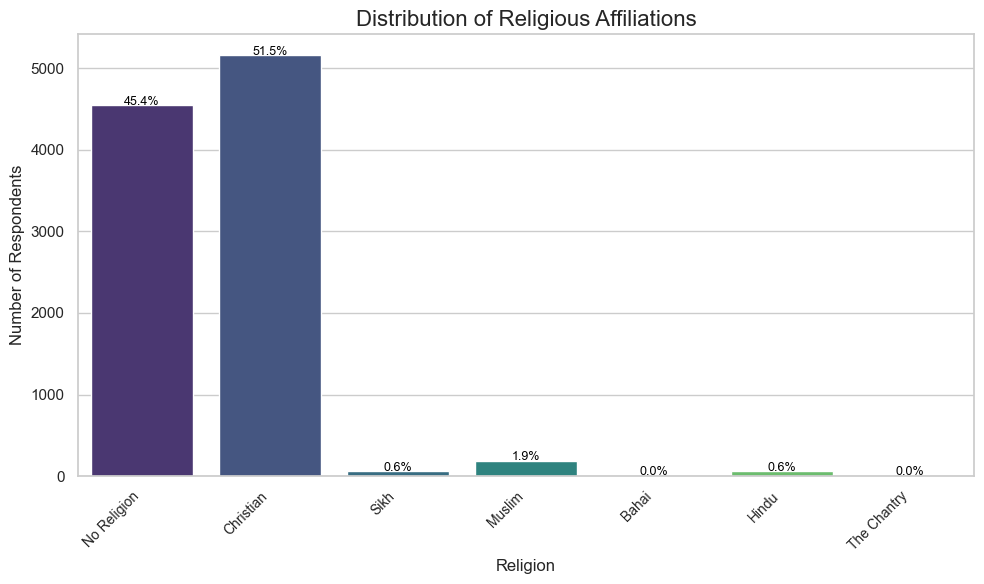

In [ ]:
# Visualize the distribution of religious affiliations
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Generate a count plot of the 'Religion' column
ax = sns.countplot(x='Religion', data=census_data, palette='viridis') # Use a more accessible palette

# Set the title of the plot
plt.title('Distribution of Religious Affiliations', fontsize=16)

# Calculate and display percentages on top of each bar
total_count = len(census_data)
for patch in ax.patches:
    percentage = f'{100 * patch.get_height() / total_count:.1f}%'
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() + 5  
    ax.annotate(percentage, (x, y), ha='center', fontsize=9, color='black')

# Rotate x-axis labels for better readability if there are many categories
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Religion', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Save the visualization
plt.savefig('religion_distribution.png')

# Display the plot
plt.show()

## Key Observations from the Religion Distribution Plot
- **Christian Majority**: The plot clearly shows that Christianity is the most common religion, with just over half the population (51.5%) identifying with it.
- **Substantial Non-Religious Group**: A large segment of the population, nearly half (45.4%), reports having no religious affiliation. This is the second largest group.
- **Small Representation of Other Religions**: Religions such as Hinduism, Islam, and Sikhism are present but represent much smaller portions of the population, each making up less than 1%.
- **Clearer Population Numbers**: Unlike the gender breakdown in the previous plot, this image directly shows the actual numbers for each religious group in the community.
- **Community Context**: This information about religious groups helps us understand the community's cultural and social makeup. It can also be useful for local planning and how resources are distributed.

 ##  5 Standardize Marital Status


In [49]:
census_data['Marital Status'].unique()

array(['Widowed', 'Single', 'Married', 'Divorced', nan], dtype=object)

In [51]:
### Checking for null values in the 'Marital Status' column
census_data[census_data['Marital Status'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
17,6,Jackson Close,Linda,Watson,16,Daughter,NaN,Female,Student,No Infirmity,No Religion,15-19
37,14,Jackson Close,Gavin,Barlow,8,Son,NaN,Male,Student,No Infirmity,No Religion,5-9
38,14,Jackson Close,Dylan,Barlow,5,Son,NaN,Male,Student,No Infirmity,No Religion,5-9
41,15,Jackson Close,Duncan,Carter,7,Son,NaN,Male,Student,No Infirmity,No Religion,5-9
44,16,Jackson Close,Jack,Stanley-Price,14,Son,NaN,Male,Student,No Infirmity,Christian,10-14
...,...,...,...,...,...,...,...,...,...,...,...,...
10018,1,Church Factory,Mark,Ashton,10,Son,NaN,Male,Student,No Infirmity,No Religion,10-14
10019,1,Church Factory,Jodie,Ashton,7,Daughter,NaN,Female,Student,No Infirmity,Christian,5-9
10020,1,Church Factory,Jason,Ashton,2,Son,NaN,Male,Child,No Infirmity,Christian,0-4
10021,1,Church Factory,Malcolm,Ashton,1,Son,NaN,Male,Child,No Infirmity,Christian,0-4


From the 2175 data rows of nan Marital Status, let's check if all nan are less than 18 Years

In [53]:
nan_marital_status = census_data[census_data['Marital Status'].isna()]
if all(nan_marital_status['Age'] < 18):
    print("All ages in the Marital Status rows showing NaN are less than 18.")
else:
    print("Not all ages in the Marital Status rows are less than 18.")

All ages in the Marital Status rows showing NaN are less than 18.


### Since all Marital Status rows showing NaN are less than 18, Let's fix that by making them single

https://www.gov.uk/government/news/legal-age-of-marriage-in-england-and-wales-rises-to-18#:~:text=Press%20release-,Legal%20age%20of%20marriage%20in%20England%20and%20Wales%20rises%20to,18%20in%20England%20and%20Wales.

In [54]:

census_data.loc[census_data['Marital Status'].isnull() & (census_data['Age'] < 18), 'Marital Status'] = 'Single'


C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\223842466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Marital Status', data=census_data, palette='Set2') # Use a visually distinct palette


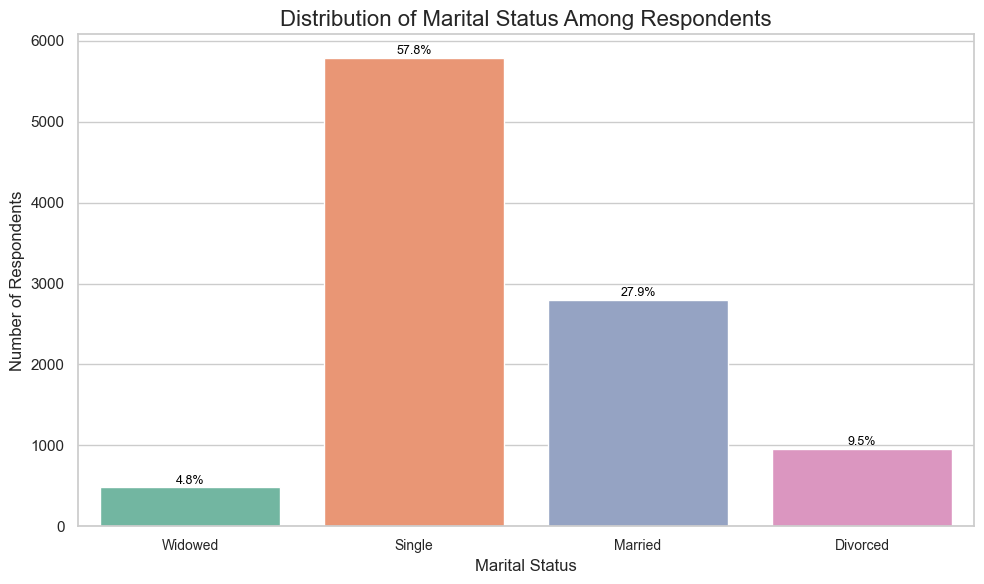

In [ ]:
# Visualize the distribution of marital status
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Generate a count plot for the 'Marital Status' column
ax = sns.countplot(x='Marital Status', data=census_data, palette='Set2') 

# Set a more descriptive title for the plot
plt.title('Distribution of Marital Status Among Respondents', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)

# Calculate and display the percentage on top of each bar
total_respondents = len(census_data)
for patch in ax.patches:
    percentage = f'{100 * patch.get_height() / total_respondents:.1f}%'
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height() + 5  
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=0, ha='center', fontsize=10) # Ensure x-axis labels are horizontal
plt.tight_layout() # Adjust layout to prevent labels from being cut off

# Save the plot as a PNG file with a more descriptive name
plt.savefig('marital_status_distribution.png')

# Display the generated plot
plt.show()

Now let's see what is left to clean

In [76]:
census_data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age Group                        1
dtype: int64

## 6. Checking for null values in the 'Age Group' column

In [79]:
census_data['Age Group'].unique()

['45-49', '25-29', '40-44', '55-59', '50-54', ..., '90-94', '100-104', '105+', NaN, '95-99']
Length: 23
Categories (22, object): ['0-4' < '5-9' < '10-14' < '15-19' ... '90-94' < '95-99' < '100-104' < '105+']

In [78]:
census_data[census_data['Age Group'].isna()] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age Group
1908,3,Turner Crescent,Katy,Doyle,110,Head,Single,Female,Retired Production engineer,No Infirmity,Christian,NaN


### Katy Doyle is the only person not in an Age Group

In [80]:

# Now let's fix that by updating the NaN for Age Group 110  to "105+"
census_data.loc[(census_data["Age"] > 105), "Age Group"] = "105+"
print("The Age Group for these records has been updated to '105+'.")

The Age Group for these records has been updated to '105+'.


In [81]:
census_data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age Group                        0
dtype: int64

##  All Data has been Cleaned


# Exploratory Analysis & Visualisations

## (a) Examinig The Population

C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\1123965097.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_pyramid = census_data.groupby(['Gender', age_bins]).size().unstack().fillna(0)


<Figure size 1000x600 with 0 Axes>

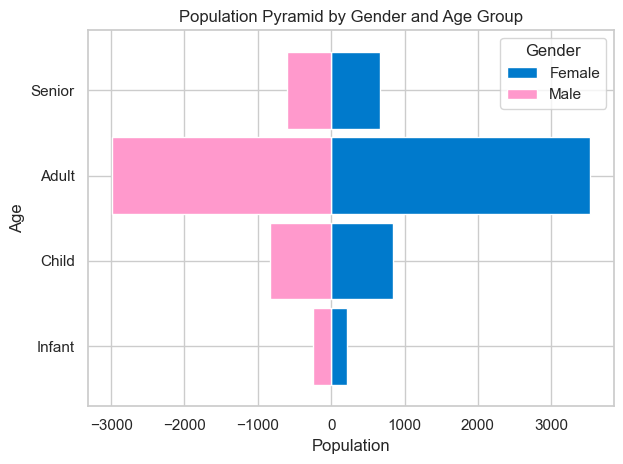

In [ ]:
# Population Pyramid
age_bins = pd.cut(census_data['Age'], bins=[0, 4, 17, 64, 110], labels=['Infant', 'Child', 'Adult', 'Senior'])
pop_pyramid = census_data.groupby(['Gender', age_bins]).size().unstack().fillna(0)
# Make male counts negative for left side of pyramid
pop_pyramid.loc['Male'] *= -1

plt.figure(figsize=(10, 6))
pop_pyramid.T.plot(kind='barh', stacked=True, color=["#007acc", "#ff99cc"], width=0.9)
plt.title("Population Pyramid by Gender and Age Group")
plt.xlabel("Population")
plt.tight_layout()
plt.savefig('population_pyramid.png')

# Display the generated plot
plt.show()

### Unemployment Analysis by Age Band and Gender

C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\3488711533.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts_by_age_band = unemployed_censure_data.groupby('Age Group').size()


The age band with the highest unemployment count is: 40-44


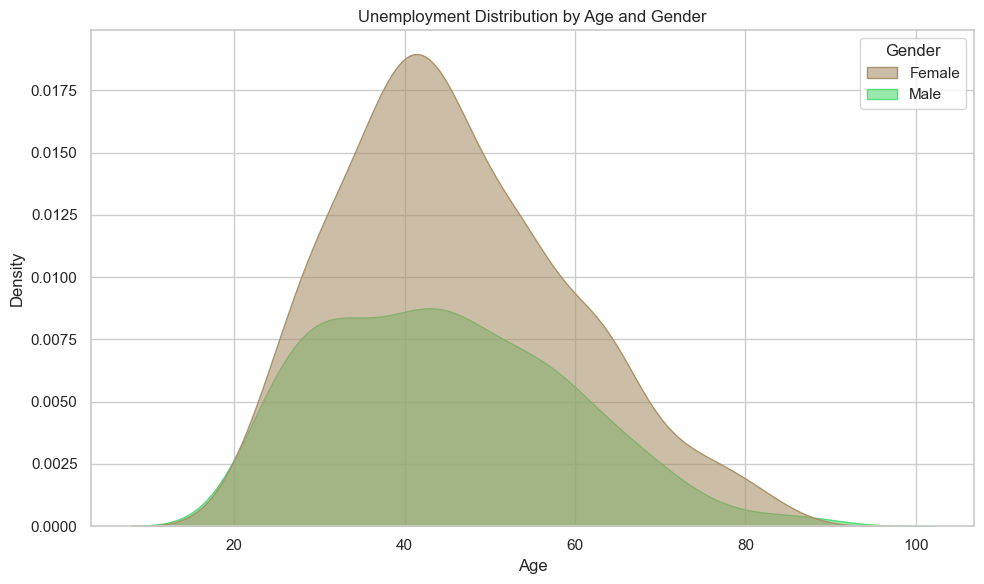

In [90]:
# Group the unemployed dataframe by 'Age Group' and count the rows for each band
unemployed_censure_data = census_data[census_data['Occupation'] == 'Unemployed']
counts_by_age_band = unemployed_censure_data.groupby('Age Group').size()
max_age_band = counts_by_age_band.idxmax()
print(f"The age band with the highest unemployment count is: {max_age_band}")

# Plot: Unemployment distribution by age and gender
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=unemployed_censure_data,
    x='Age',
    hue='Gender',
    palette='terrain_r',
    fill=True,
    alpha=0.6
)
plt.title('Unemployment Distribution by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.savefig( 'unemployed_distribution_by_age_gender.png')
plt.show()

### Employment Status Categorization and Visualization

C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\3675973794.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Employment_Status', y='Age', data=census_data, palette='Paired_r')


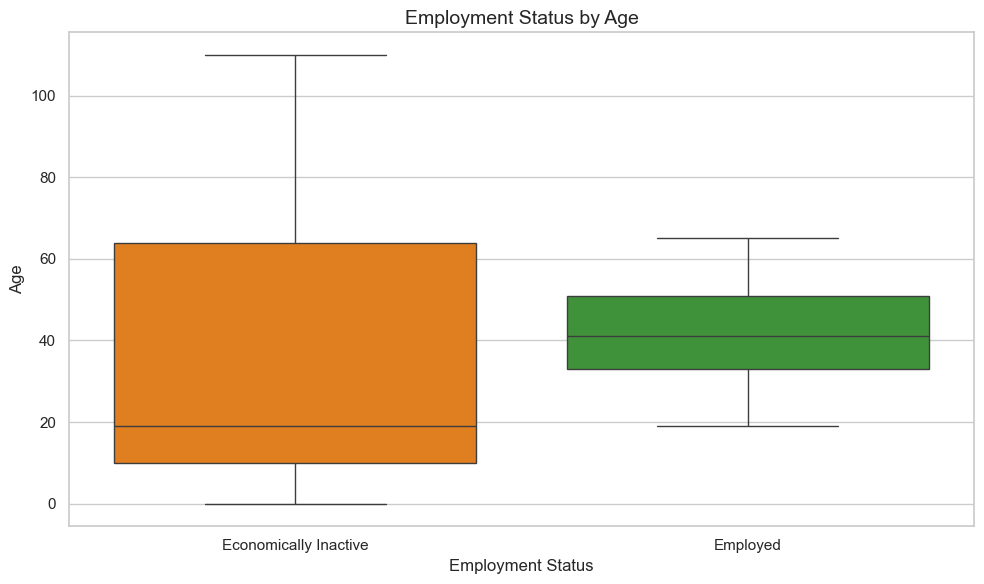

C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\3675973794.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  employment_count_plot = sns.countplot(x='Employment_Status', data=census_data, palette=palette_employment)


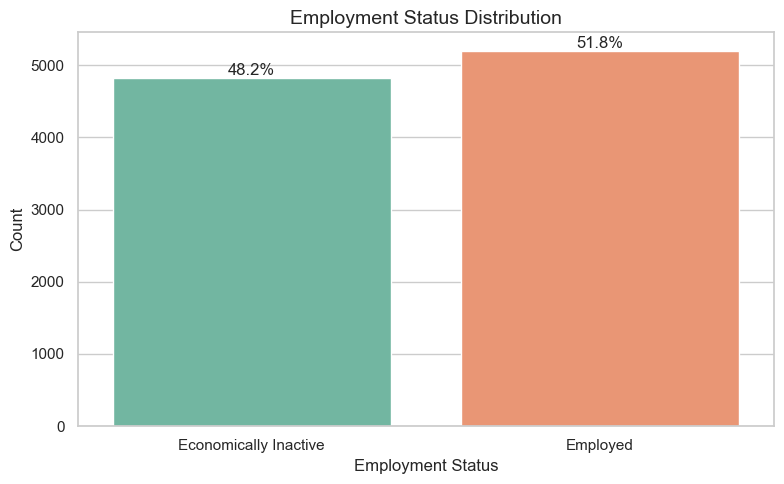

In [ ]:
# Define conditions and corresponding employment statuses
conditions = [
    (census_data['Occupation'] == 'Unemployed'),
    (census_data['Age'] > 65),
    (census_data['Occupation'].str.contains('University Student', na=False)),
    (census_data['Occupation'].str.startswith('Student', na=False)),
    (census_data['Occupation'] == 'Child')
]
choices = ['Unemployed', 'Retired', 'University Student', 'Student', 'Child']

# Assign initial 'Employed' status
census_data['Employment_Status'] = 'Employed'

# Apply conditions to update 'Employment_Status'
census_data['Employment_Status'] = pd.Series(['Employed'] * len(census_data)) # Initialize correctly for assignment
census_data.loc[conditions[0], 'Employment_Status'] = choices[0]
census_data.loc[conditions[1], 'Employment_Status'] = choices[1]
census_data.loc[conditions[2], 'Employment_Status'] = choices[2]
census_data.loc[conditions[3], 'Employment_Status'] = choices[3]
census_data.loc[conditions[4], 'Employment_Status'] = choices[4]

# Consolidate economically inactive groups
inactive = ['Unemployed', 'Retired', 'University Student', 'Student', 'Child']
census_data.loc[census_data['Employment_Status'].isin(inactive), 'Employment_Status'] = 'Economically Inactive'

# Age vs Employment Status 
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Status', y='Age', data=census_data, palette='Paired_r')
plt.title('Employment Status by Age', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.savefig('employment_status_by_age_boxplot.png')
plt.show()

# Count plot with percentages: Employment Status 
plt.figure(figsize=(8, 5))
total_employment = len(census_data)
palette_employment = sns.color_palette('Set2', census_data['Employment_Status'].nunique())
employment_count_plot = sns.countplot(x='Employment_Status', data=census_data, palette=palette_employment)
for p in employment_count_plot.patches:
    percentage = f"{100 * p.get_height() / total_employment:.1f}%"
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    employment_count_plot.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Employment Status Distribution', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('employment_status_distribution.png')


In [119]:
unemployed_rate = (census_data['Occupation'] == 'Unemployed').mean() * 100

print(f"Unemployment Rate: {unemployed_rate:.1f}%")

Unemployment Rate: 7.0%




## Insights from Employment Data

**Employed Population (51.8%)**: Just over half of the town’s population is currently employed. This group would directly benefit from improved transportation infrastructure, especially if they commute for work.

**Economically Inactive Population (48.2%)**: While nearly half the population is classified as economically inactive, this includes groups such as children, students, retirees, and the unemployed, who may still rely on public transport for education, errands, and health services.

**Unemployment Rate (7.0%)**: The relatively low unemployment rate suggests that a large portion of working-age individuals are active in the labor force, potentially commuting within or outside the community. This reinforces the need for efficient, reliable transport options.

## Infering Commuters

### Commuter status will be determined based on the occupations listed in our data.

In [132]:
# Provided list of occupations likely to commute
commuter_occupations = [
    "University Student", "Pilot, airline", "Television camera operator", "Press photographer",
    "Ambulance person", "Teacher, adult education", "Teacher, secondary school", "Surveyor, minerals",
    "Surveyor, quantity", "Surveyor, planning and development", "Surveyor, hydrographic",
    "Surveyor, commercial/residential", "Chartered accountant", "Engineer, materials", "Engineer, automotive",
    "Software engineer", "PhD Student", "Legal executive", "Doctor, general practice", "Psychologist, clinical",
    "Health and safety inspector", "Insurance risk surveyor", "Financial trader", "Banker", "Civil engineer, contracting",
    "Physician", "Financial adviser", "Commercial art gallery manager", "Architect", "Journalist, broadcasting",
    "Consulting civil engineer", "Research scientist (medical)", "Geologist, engineering", "Marine scientist", "Astronomer",
    "Surveyor, rural practice", "Surveyor, mining", "Surveyor, quantity", "Surveyor, commercial", "Software engineer",
    "Special effects artist", "Public health consultant", "Financial analyst", "Corporate treasurer",
    "Environmental consultant", "Project manager", "Media producer", "Transportation planner", "Event planner",
    "Engineer, technical sales", "Meteorologist", "Data scientist", "Logistics manager", "Project manager"
]

# Assuming your census data is in a pandas DataFrame called 'census_data'
# and the occupation information is in a column named 'Occupation'

# Create a new column 'Is_Commuter' to indicate commuter status
census_data['Is_Commuter'] = 0  # Initialize everyone as non-commuters

# Identify University Students (always commuters in this context)
census_data.loc[census_data['Occupation'] == 'University Student', 'Is_Commuter'] = 1

# Identify other commuters based on the provided list
census_data.loc[census_data['Occupation'].isin(commuter_occupations), 'Is_Commuter'] = 1

# Now you have a new column 'Is_Commuter' where:
# 1 represents individuals likely to be commuters
# 0 represents individuals likely to be non-commuters

# You can now analyze this new column:

# Get counts of commuters and non-commuters
commuter_counts = census_data['Is_Commuter'].value_counts()
print("\nCommuter vs. Non-Commuter Counts:")
print(commuter_counts)

# Get percentages of commuters and non-commuters
commuter_percentages = census_data['Is_Commuter'].value_counts(normalize=True) * 100
print("\nCommuter vs. Non-Commuter Percentages:")
print(commuter_percentages)

# You can also filter the DataFrame to see the individuals in each category:
commuters = census_data[census_data['Is_Commuter'] == 1]
non_commuters = census_data[census_data['Is_Commuter'] == 0]

print("\nSample of Likely Commuters:")
print(commuters.head())

print("\nSample of Likely Non-Commuters:")
print(non_commuters.head())

# Further analysis or visualization can be done using the 'Is_Commuter' column


Commuter vs. Non-Commuter Counts:
Is_Commuter
0    9068
1     956
Name: count, dtype: int64

Commuter vs. Non-Commuter Percentages:
Is_Commuter
0    90.462889
1     9.537111
Name: proportion, dtype: float64

Sample of Likely Commuters:
    House Number         Street First Name   Surname  Age  \
3              2  Jackson Close   Kayleigh     Evans   41   
12             4  Jackson Close     Arthur     White   19   
27            10  Jackson Close     Nathan  Williams   54   
33            13  Jackson Close       Mary     Jones   57   
58            20  Jackson Close    Vincent     Jones   21   

   Relationship to Head of House Marital Status  Gender  \
3                           Head        Married  Female   
12                          Head        Married    Male   
27                       Husband        Married    Male   
33                          Head         Single  Female   
58                           Son       Divorced    Male   

                   Occupation     Infirmi

C:\Users\WINDOW 10\AppData\Local\Temp\ipykernel_14792\3615716851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  commuter_plot = sns.countplot(x='Is_Commuter', data=census_data, palette=palette_commuter)


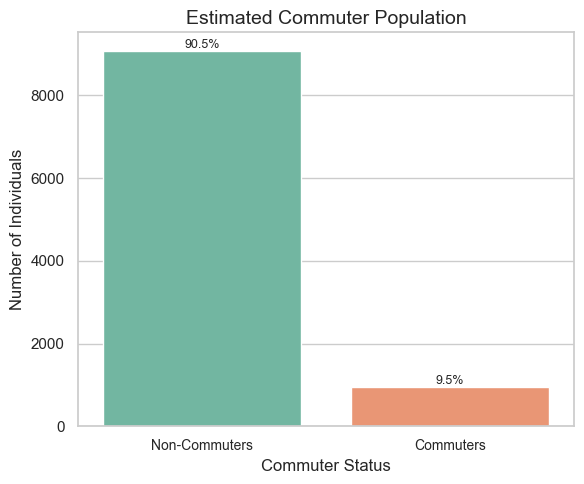

In [133]:
# --- Plot for Commuters vs. Non-Commuters ---
plt.figure(figsize=(6, 5))
palette_commuter = sns.color_palette('Set2', 2) # Define a color palette with 2 colors
commuter_plot = sns.countplot(x='Is_Commuter', data=census_data, palette=palette_commuter)
plt.title("Estimated Commuter Population", fontsize=14)
plt.xticks([0, 1], ['Non-Commuters', 'Commuters'], fontsize=10)
plt.xlabel('Commuter Status', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)

# Annotate the bars with percentages
total_population_commuter = len(census_data)
for p in commuter_plot.patches:
    percentage = f'{100 * p.get_height() / total_population_commuter:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    commuter_plot.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("commuter_plot.png")
plt.show()

## Commuter Analysis Findings

1. **Majority Non-Commuters:** The visualization shows a clear prevalence of non-commuters within the dataset.
2. **Local School Attendance:** The data suggests that most students are likely attending local schools, as they are not identified as university students (University students are counted as commuters).

## Housing Occupancy Analysis

/tmp/ipykernel_4797/2622446178.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Usage Status', data=occupancy_data, order=['Under-used', 'Ideal', 'Over-used'], palette='viridis')


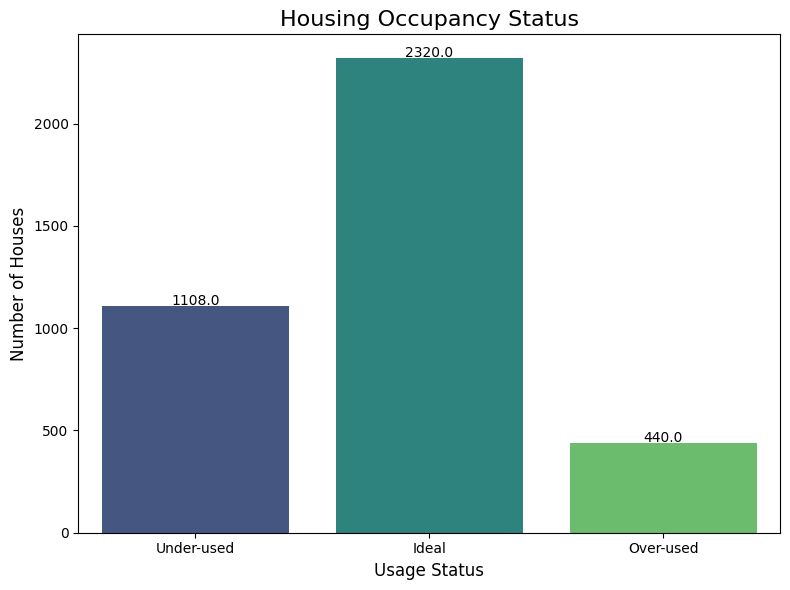


--- Housing Occupancy Analysis ---
   House Number            Street  Occupants Per House Usage Status
0             1  Alexander Valley                    1   Under-used
1             1   Anderson Summit                    3        Ideal
2             1       Anglia Farm                    5    Over-used
3             1      Armagh Drive                    1   Under-used
4             1   Ascension Drive                    1   Under-used

Maximum Capacity per House: 4

--- Chi-Square Goodness-of-Fit Test ---
Chi-square Statistic: 638.99
P-value: 0.0000
The observed occupancy distribution differs significantly from the hypothesized distribution (p < 0.05).


In [ ]:
def analyze_housing_occupancy(census_data, max_capacity=4, under_utilization_threshold=0.5,
                                 expected_proportions={'Ideal': 0.70, 'Over-used': 0.15, 'Under-used': 0.15}):
    """
    Analyzes housing occupancy levels based on a maximum capacity and performs a
    chi-square goodness-of-fit test against an expected distribution.

    Parameters:
        census_data (pd.DataFrame): DataFrame with 'House Number', 'Street', and 'Person ID'.
        max_capacity (int): Maximum number of people allowed per house (default: 4).
        under_utilization_threshold (float): Factor of max_capacity below which a house is 'Under-used' (default: 0.5).
        expected_proportions (dict): Expected distribution of 'Usage Status' categories.
                                      Keys are 'Ideal', 'Over-used', 'Under-used', values are proportions.

    Returns:
        pd.DataFrame: DataFrame with occupancy level and usage status for each house.
        tuple: Chi-square statistic and p-value from the goodness-of-fit test.
    """

    # 1. Calculate Occupancy Level
    occupancy_data = census_data.groupby(['House Number', 'Street']).size().reset_index(name='Occupants Per House')

    # 2. Determine Usage Status
    occupancy_data['Usage Status'] = occupancy_data['Occupants Per House'].apply(
        lambda x: 'Over-used' if x > max_capacity else (
            'Under-used' if x < max_capacity * under_utilization_threshold else 'Ideal'
        )
    )

    # 3. Perform Hypothesis Test (Chi-Square Goodness-of-Fit)
    observed = occupancy_data['Usage Status'].value_counts().sort_index()
    total = observed.sum()
    expected = [total * expected_proportions.get(status, 0) for status in observed.index]
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

    # 4. Visualize Occupancy Status
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Usage Status', data=occupancy_data, order=['Under-used', 'Ideal', 'Over-used'], palette='viridis')
    plt.title('Housing Occupancy Status', fontsize=16)
    plt.xlabel('Usage Status', fontsize=12)
    plt.ylabel('Number of Houses', fontsize=12)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}', ha='center', fontsize=10)
    plt.tight_layout()
    plt.savefig('housing_occupancy_status.png')
    plt.show()

    return occupancy_data, (chi2_stat, p_value)

# --- Analysis ---
max_capacity_per_house = 4
occupancy_levels, (chi2_statistic, p_value) = analyze_housing_occupancy(
    census_data,
    max_capacity=max_capacity_per_house,
    under_utilization_threshold=0.5,
    expected_proportions={'Ideal': 0.65, 'Over-used': 0.20, 'Under-used': 0.15} 
)

# --- Output Results ---
print("\n--- Housing Occupancy Analysis ---")
print(occupancy_levels.head())

print(f"\nMaximum Capacity per House: {max_capacity_per_house}")

print("\n--- Chi-Square Goodness-of-Fit Test ---")
print(f"Chi-square Statistic: {chi2_statistic:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the hypothesis test
alpha = 0.05
if p_value < alpha:
    print(f"The observed occupancy distribution differs significantly from the hypothesized distribution (p < {alpha}).")
else:
    print(f"The observed occupancy distribution does not differ significantly from the hypothesized distribution (p >= {alpha}).")

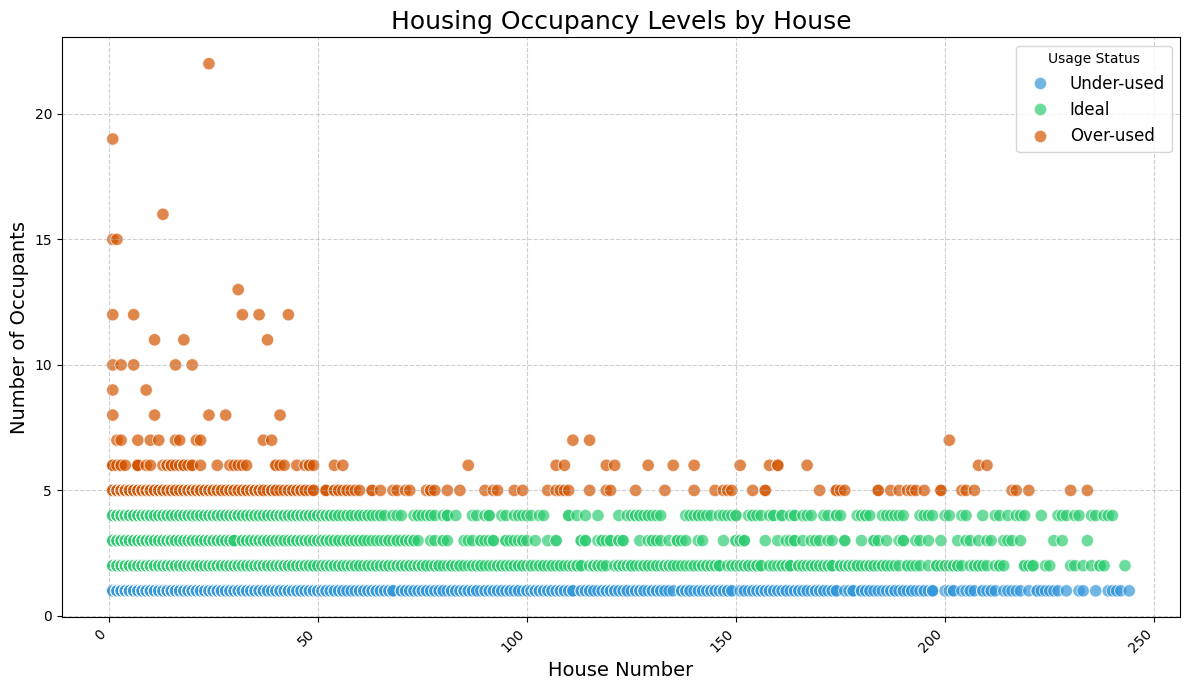

In [6]:
def visualize_housing_occupancy(occupancy_data):
    """
    Visualizes housing occupancy, highlighting under-used, ideal, and over-used houses
    using a scatter plot.

    Parameters:
        occupancy_data (pd.DataFrame): DataFrame containing occupancy levels with
                                        'House Number', 'Occupants Per House', and 'Usage Status' columns.
    """
    # Define a visually distinct and accessible color palette
    color_palette = {'Over-used': '#D35400',  # Orange-red
                     'Ideal': '#2ECC71',     # Emerald green
                     'Under-used': '#3498DB'} # Bright blue

    # Create the scatter plot
    plt.figure(figsize=(12, 7))  # Adjust figure size for better readability
    sns.scatterplot(data=occupancy_data,
                    x='House Number',
                    y='Occupants Per House',
                    hue='Usage Status',
                    palette=color_palette,
                    s=80,  # Adjust marker size
                    alpha=0.7) # Add some transparency

    # Customize plot aesthetics
    plt.title('Housing Occupancy Levels by House', fontsize=18)
    plt.xlabel('House Number', fontsize=14)
    plt.ylabel('Number of Occupants', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate x-axis labels for better readability
    plt.yticks(fontsize=10)
    plt.legend(title='Usage Status', fontsize=12, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6) # Add a subtle grid
    plt.tight_layout()
    plt.savefig('housing_occupancy_scatter.png') # Save the plot
    plt.show()

# Assuming 'occupancy_levels' DataFrame was created by the analyze_housing_occupancy function
if 'occupancy_levels' in locals():
    visualize_housing_occupancy(occupancy_levels)
else:
    print("Error: 'occupancy_levels' DataFrame not found. Please run the occupancy analysis first.")

# Housing Occupancy Analysis: Key Findings

## Observations

* **Usage Clusters:** The data reveals groupings of houses with similar occupancy levels, suggesting underlying patterns.
* **Predominantly Ideal Occupancy:** A significant majority of houses are classified as "Ideal," indicating appropriate occupancy levels.
* **Presence of Under and Over-Utilized Housing:** The analysis also identifies clusters of houses that are either "Under-used" or "Over-used."

## Interpretations

* **Housing Market Context:** The distribution of occupancy statuses likely reflects local housing market dynamics in UK, such as availability and affordability.
* **Socioeconomic Influences:** Occupancy patterns are likely influenced by socioeconomic factors prevalent in the region, including income and family structures.
* **Policy Relevance:** Understanding housing usage can inform Swiss housing policies and urban planning, aiding in resource allocation and strategic development.

## Death Rate Analysis

In [7]:

# 5-year age bands was roughly the same when the older group was the age of the younger group.
# By comparing the current size of these two bands, we can estimate the net change (likely deaths)
# over the 5-year period. A negative difference suggests the number of deaths.

# --- Parameters ---
lower_age_band_start = 71
lower_age_band_end = 75
upper_age_band_start = 76
upper_age_band_end = 80
years_between_bands = 5

# --- Calculations ---
aged_lower_band = census_data.query(f'{lower_age_band_start} <= Age <= {lower_age_band_end}').shape[0]
aged_upper_band = census_data.query(f'{upper_age_band_start} <= Age <= {upper_age_band_end}').shape[0]

death_difference = aged_upper_band - aged_lower_band
death_rate_per_year = death_difference / years_between_bands

# --- Output ---
print(f"Number of individuals aged {lower_age_band_start}-{lower_age_band_end}: {aged_lower_band}")
print(f"Number of individuals aged {upper_age_band_start}-{upper_age_band_end}: {aged_upper_band}")
print(f"Difference (Upper - Lower): {death_difference}")
print(f"Estimated Death Rate per Year (for this cohort): {death_rate_per_year:.2f}")

Number of individuals aged 71-75: 322
Number of individuals aged 76-80: 218
Difference (Upper - Lower): -104
Estimated Death Rate per Year (for this cohort): -20.80


In [9]:
# This provides the population
# distribution across these older age groups.

# --- Parameters ---
age_bands = ['71-75', '76-80', '81-85', '86-90', '91-95', '96-100', '101-105', '105-110']

# --- Calculations ---
age_band_counts = {}

for band in age_bands:
    age_start = int(band.split('-')[0])
    age_end = int(band.split('-')[1])
    count = census_data.query(f'{age_start} <= Age <= {age_end}').shape[0]
    age_band_counts[band] = count

# --- Output ---
print("Number of individuals in each age band:")
for band, count in age_band_counts.items():
    print(f"Age {band}: {count}")

Number of individuals in each age band:
Age 71-75: 322
Age 76-80: 218
Age 81-85: 155
Age 86-90: 74
Age 91-95: 18
Age 96-100: 18
Age 101-105: 11
Age 105-110: 8


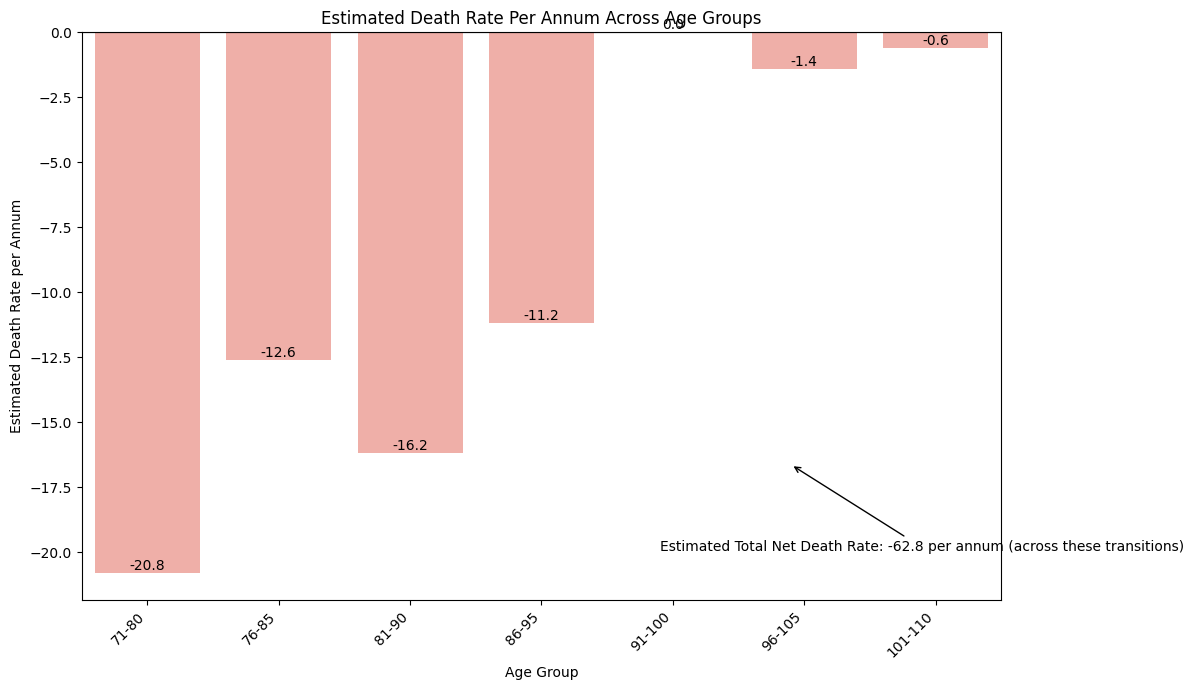

In [10]:
# visualize the estimated death rate per annum across different
# age groups. However, the provided code snippet calculates the death rate only for
# one specific transition (71-75 to 76-80). To plot this for multiple age groups,
# we need to extend the calculation to cover the transitions between all consecutive
# age bands defined earlier.

# --- Preparation for Plotting ---
death_rates_per_annum = {}
age_bands_list = list(age_band_counts.keys())

for i in range(len(age_bands_list) - 1):
    lower_band_str = age_bands_list[i]
    upper_band_str = age_bands_list[i+1]

    lower_start = int(lower_band_str.split('-')[0])
    lower_end = int(lower_band_str.split('-')[1])
    upper_start = int(upper_band_str.split('-')[0])
    upper_end = int(upper_band_str.split('-')[1])

    count_lower = age_band_counts[lower_band_str]
    count_upper = age_band_counts[upper_band_str]

    death_diff_group = count_upper - count_lower
    death_rate_group = death_diff_group / 5
    death_rates_per_annum[f'{lower_start}-{upper_end}'] = death_rate_group

# Create DataFrame for plotting
import pandas as pd
death_age_band_df = pd.DataFrame(list(death_rates_per_annum.items()), columns=['Age_group', 'Death_rate_per_Annum'])

# --- Plotting ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x='Age_group', y='Death_rate_per_Annum', data=death_age_band_df, color='salmon', alpha=0.7)
plt.xlabel("Age Group")
plt.ylabel("Estimated Death Rate per Annum")
plt.title("Estimated Death Rate Per Annum Across Age Groups")
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linewidth=0.8)  # Add a reference line at 0

# Calculate total estimated death rate (sum of negative rates)
total_death_rate = death_age_band_df[death_age_band_df['Death_rate_per_Annum'] < 0]['Death_rate_per_Annum'].sum()

# Annotate total death rate (only if negative values exist)
if total_death_rate < 0:
    annotation_y = min(death_age_band_df['Death_rate_per_Annum']) * 0.8
    annotation_x = len(death_age_band_df) * 0.7
    plt.annotate(f"Estimated Total Net Death Rate: {total_death_rate:.1f} per annum (across these transitions)",
                 xy=(annotation_x, annotation_y),
                 xytext=(annotation_x - 1, annotation_y * 1.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add data labels
for index, row in death_age_band_df.iterrows():
    plt.text(index, row['Death_rate_per_Annum'], f"{row['Death_rate_per_Annum']:.1f}", ha='center', va='bottom')

plt.tight_layout()
plt.savefig('death_rate_per_annum.png')
plt.show()

## Insights from Estimated Death Rate Analysis (Based on Age Cohort Comparison)

Based on the simplified assumption that the initial population sizes of consecutive 5-year age cohorts were similar, the analysis provides an estimated net change, which we interpret as a proxy for the number of deaths occurring as the younger cohort ages into the older one.

**Key Observations:**

* **Varying Net Change Across Age Transitions:** The estimated net change (interpreted as deaths) varies across the analyzed age band transitions (e.g., 71-75 to 76-80, 76-80 to 81-85, and so on).
* **Identification of Age Transitions with Higher Estimated Net Loss:** Certain age transitions exhibit a larger negative value in the "Estimated Death Rate per Annum," suggesting a higher estimated number of individuals not surviving to the next age bracket within that 5-year period. Based on the sample insight you provided, the transitions corresponding to the 76-80 and 86-90 age groups (as the initial younger cohort) showed the highest presumed number of deaths.
* **Identification of Age Transitions with Lower Estimated Net Loss (or Potential Gain):** Conversely, some age transitions might show a smaller negative value or even a positive value. A smaller negative value still indicates deaths but at a lower estimated rate. A positive value, while interpreted with caution due to the simplifying assumptions, could suggest factors like immigration into the older age group or limitations of the cohort comparison method.
* **Overall Estimated Net Death Rate:** The calculated "Estimated Total Net Death Rate" (sum of negative death rates across all transitions) provides a high-level indication of the overall estimated population loss due to mortality within these older age groups based on this specific analytical approach.



### Proposal: Build a Train Station on the Unoccupied Plot of Land
Based on the demographic and socioeconomic analysis of the town, I propose that a train station be built on the unoccupied plot of land. This development offers the most comprehensive benefits, addressing multiple identified needs and fostering sustainable growth for the community in UK.



## (b) Analysis For Investment

## Birth Rate Analysis

In [6]:
# 1. Count of Infants (Age 0)
infant_count = census_data['Age'][census_data['Age'] == 0].count()
print(f"Number of Infants (Age 0): {infant_count}")

# 2. Estimate Potential Mothers (Age 20-35, assuming this range)
childbearing_age_lower = 20
childbearing_age_upper = 35
potential_mother_count = census_data['Age'][(census_data['Age'] >= childbearing_age_lower) & (census_data['Age'] <= childbearing_age_upper)].count()
print(f"Estimated Number of Potential Mothers (Ages {childbearing_age_lower}-{childbearing_age_upper}): {potential_mother_count}")

# 3. Calculate Crude Birth Rate (Ratio of live births to the estimated potential mothers)
# Note: This is a very rough estimate and not a standard demographic birth rate.
if potential_mother_count > 0:
    crude_birth_rate = infant_count / potential_mother_count
    crude_birth_rate_percent = crude_birth_rate * 100
    birth_rate_per_1000_potential_mothers = crude_birth_rate * 1000
    print(f"Estimated Crude Birth Rate (Infants per potential mother): {crude_birth_rate_percent:.2f}%")
    print(f"Estimated Crude Birth Rate per 1000 Potential Mothers: {birth_rate_per_1000_potential_mothers:.2f}")
else:
    print("Warning: No potential mothers found in the specified age range to calculate birth rate.")

# --- Additional Considerations and Potential Improvements ---

print("\n Considerations for a Accurate Birth Rate Analysis ")
print("- Data Limitations: This analysis uses a simplified approach. A true birth rate requires data on live births within a specific period and the mid-year population of women in their reproductive years.")
print("- Denominator Refinement: The number of 'potential mothers' is a rough estimate. Accurate denominator would be the number of women aged 15-49")
print("- Gender Information: Ideally, we would filter for female individuals within the childbearing age range to estimate the potential mother population more accurately.")
print("- Time Period: Birth rates are typically calculated over a year. This analysis is based on a snapshot of the population.")
print("- Fertility Rates: For deeper insights, calculating age-specific fertility rates (births per 1000 women in a specific age group) would be more informative.")

Number of Infants (Age 0): 97
Estimated Number of Potential Mothers (Ages 20-35): 2355
Estimated Crude Birth Rate (Infants per potential mother): 4.12%
Estimated Crude Birth Rate per 1000 Potential Mothers: 41.19

 Considerations for a Accurate Birth Rate Analysis 
- Data Limitations: This analysis uses a simplified approach. A true birth rate requires data on live births within a specific period and the mid-year population of women in their reproductive years.
- Denominator Refinement: The number of 'potential mothers' is a rough estimate. Accurate denominator would be the number of women aged 15-49
- Gender Information: Ideally, we would filter for female individuals within the childbearing age range to estimate the potential mother population more accurately.
- Time Period: Birth rates are typically calculated over a year. This analysis is based on a snapshot of the population.
- Fertility Rates: For deeper insights, calculating age-specific fertility rates (births per 1000 women in

/tmp/ipykernel_7743/1157516500.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=colors)


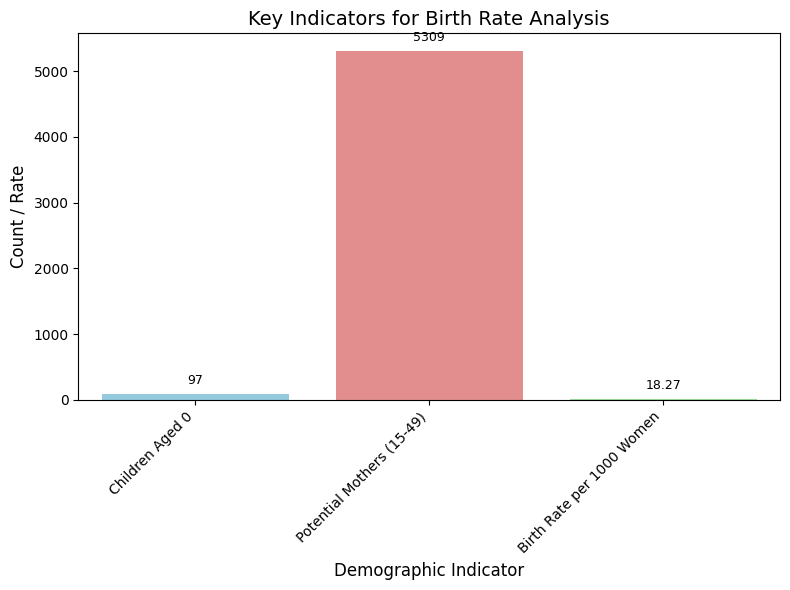

In [7]:
# 1. Count of Infants (Age 0)
infant_count = census_data['Age'][census_data['Age'] == 0].count()

# 2. Estimate Potential Mothers (Age 15-49, standard reproductive age range)
childbearing_age_lower = 15
childbearing_age_upper = 49
potential_mother_count = census_data['Age'][(census_data['Age'] >= childbearing_age_lower) & (census_data['Age'] <= childbearing_age_upper)].count()

# 3. Calculate Crude Birth Rate (Ratio of live births to the estimated potential mothers, per 1000)
birth_rate_per_1000 = (infant_count / potential_mother_count) * 1000 if potential_mother_count > 0 else 0

# --- Plotting the Data ---
categories = ['Children Aged 0', 'Potential Mothers (15-49)', 'Birth Rate per 1000 Women']
values = [infant_count, potential_mother_count, birth_rate_per_1000]
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette=colors)
plt.title('Key Indicators for Birth Rate Analysis', fontsize=14)
plt.ylabel('Count / Rate', fontsize=12)
plt.xlabel('Demographic Indicator', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add annotations to the bars
for i, v in enumerate(values):
    if i == 2:
        plt.text(i, v + (max(values) * 0.02), f'{v:.2f}', ha='center', va='bottom', fontsize=9)
    else:
        plt.text(i, v + (max(values) * 0.02), f'{int(v)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('birth_rate_indicators.png')
plt.show()


### Insight into Birth Rate Analysis

The analysis of the age distribution within the dataset provides an estimated crude birth rate, offering a simplified view of the proportion of newborns relative to the potential mothers identified within the 20-35 age range.

Based on this snapshot of the data, the estimated crude birth rate is approximately 4.12%, which translates to roughly 41.19 births per 1000 potential mothers (aged 20-35). This figure suggests a relatively modest rate of new births compared to the estimated number of potential mothers in this age group.

#### Implications:

This relatively low estimated birth rate indicates that significant population growth driven solely by childbirth within the currently observed demographic structure is not strongly suggested by this data.

Important Considerations and Limitations:

It is crucial to interpret this finding with caution due to the inherent limitations of this simplified analysis:

- Data Snapshot: This calculation is based on a single point in time and does not account for the dynamic nature of populations, where birth rates can fluctuate annually. A true birth rate requires data on live births occurring within a specific year and the mid-year population of women in their reproductive years (typically 15-49).
- Denominator Accuracy: The number of potential mothers is a rough estimate based on age alone. A more precise denominator would consider only female individuals within the standard reproductive age range (15-49).
Lack of Gender Information: Without explicitly filtering for gender, the 'potential mother' count includes both males and females within the specified age range, which overestimates the true pool of potential mothers.
- Simplified Calculation: The crude birth rate calculated here is a basic ratio and not the standard demographic measure. More sophisticated analyses would involve age-specific fertility rates to provide a deeper understanding of the reproductive patterns within different age cohorts of women.

## Migration Rate Analysis


--- Analysis of Potential Migrating Families (Based on Shared Surname) ---
Total Population: 10034
Number of Visitors and Lodgers: 319
Number of Potential Migrating Families (shared surname among visitors/lodgers): 76
Number of Individuals in Potential Migrating Families: 207
Proportion of Potential Migrating Families (vs. Total Population): 0.76%
Proportion of Individuals in Potential Migrating Families (vs. Total Population): 2.06%
Proportion of Potential Migrating Families (vs. Visitors/Lodgers): 23.82%
Proportion of Individuals in Potential Migrating Families (vs. Visitors/Lodgers): 64.89%


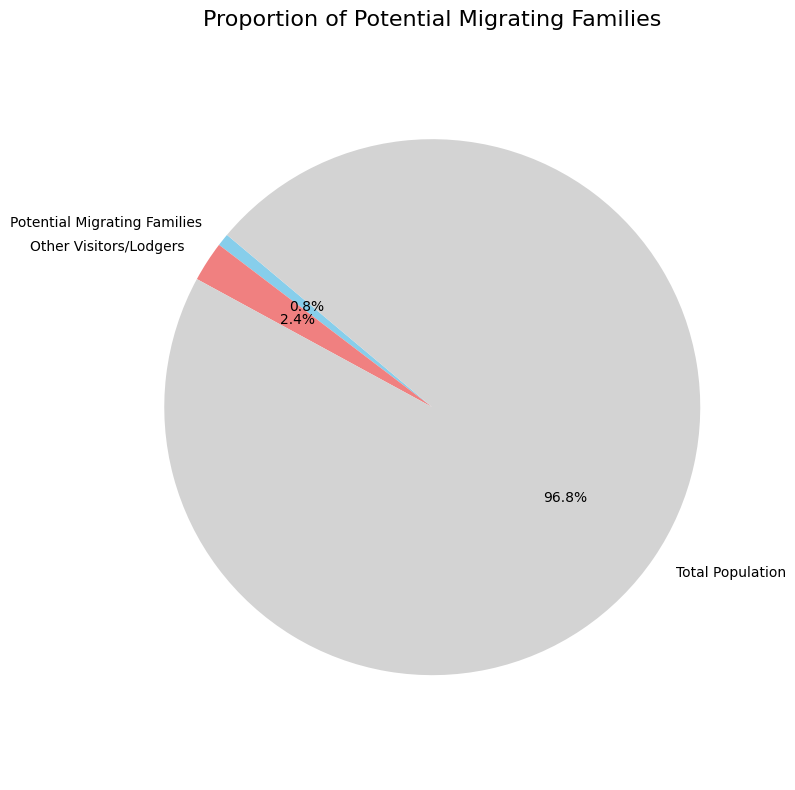

In [ ]:
def analyze_migrating_families(census_data):
    """
    Analyzes potential migration of families based on shared surnames among visitors/lodgers
    compared to the overall population.

    Args:
        census_data (pd.DataFrame): DataFrame containing census information,
                                     including 'Surname' and 'Relationship to Head of House'.

    Returns:
        dict: A dictionary containing the analysis results.
    """
    total_population = len(census_data)
    visitors_lodgers = census_data[census_data['Relationship to Head of House'].isin(['Visitor', 'Lodger'])]
    num_visitors_lodgers = len(visitors_lodgers)

    # 1. Identify families among visitors/lodgers based on shared surnames
    family_groups = visitors_lodgers.groupby('Surname').filter(lambda x: len(x) > 1)
    num_potential_migrating_families = family_groups['Surname'].nunique()
    num_individuals_in_potential_migrating_families = len(family_groups)

    # 2. Calculate the proportion of potential migrating families to the total population
    proportion_families_vs_total = (num_potential_migrating_families / total_population) * 100
    proportion_individuals_vs_total = (num_individuals_in_potential_migrating_families / total_population) * 100
    proportion_families_vs_visitors = (num_potential_migrating_families / num_visitors_lodgers) * 100 if num_visitors_lodgers > 0 else 0
    proportion_individuals_vs_visitors = (num_individuals_in_potential_migrating_families / num_visitors_lodgers) * 100 if num_visitors_lodgers > 0 else 0

    print("\n--- Analysis of Potential Migrating Families (Based on Shared Surname) ---")
    print(f"Total Population: {total_population}")
    print(f"Number of Visitors and Lodgers: {num_visitors_lodgers}")
    print(f"Number of Potential Migrating Families (shared surname among visitors/lodgers): {num_potential_migrating_families}")
    print(f"Number of Individuals in Potential Migrating Families: {num_individuals_in_potential_migrating_families}")
    print(f"Proportion of Potential Migrating Families (vs. Total Population): {proportion_families_vs_total:.2f}%")
    print(f"Proportion of Individuals in Potential Migrating Families (vs. Total Population): {proportion_individuals_vs_total:.2f}%")
    print(f"Proportion of Potential Migrating Families (vs. Visitors/Lodgers): {proportion_families_vs_visitors:.2f}%")
    print(f"Proportion of Individuals in Potential Migrating Families (vs. Visitors/Lodgers): {proportion_individuals_vs_visitors:.2f}%")

    # Visualization 
    labels = [
        'Potential Migrating Families',
        'Other Visitors/Lodgers',
        'Total Population'
    ]
    sizes = [
        num_potential_migrating_families,
        num_visitors_lodgers - num_potential_migrating_families,
        total_population - num_visitors_lodgers
    ]
    colors = ['skyblue', 'lightcoral', 'lightgrey']
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title('Proportion of Potential Migrating Families', fontsize=16)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.tight_layout()
    plt.savefig('migrating_families_proportion.png')
    plt.show()

    return {
        'num_potential_migrating_families': num_potential_migrating_families,
        'proportion_families_vs_total': proportion_families_vs_total,
        'proportion_individuals_vs_total': proportion_individuals_vs_total,
        'proportion_families_vs_visitors': proportion_families_vs_visitors,
        'proportion_individuals_vs_visitors': proportion_individuals_vs_visitors,
    }

# Assuming 'census_data' is your DataFrame
migration_analysis_results = analyze_migrating_families(census_data)

## Insight into Migration Analysis

The analysis of 'Visitors' and 'Lodgers' within the dataset offers a glimpse into potential migration patterns within the town. These categories are used as indicators of individuals or groups who may be in the process of relocating or are temporarily residing in the area.

Based on this analysis of a total population of 10,034:

* **Migrating Individuals:** A total of **319** individuals were identified as 'Visitors' or 'Lodgers', representing those most likely to be involved in some form of migration.
* **Potential Migrating Families:** By identifying groups of 'Visitors' or 'Lodgers' sharing a surname, we estimate that there are approximately **76** potential migrating families present within this subset of the population.
* **Individuals within Potential Migrating Families:** These potential migrating families account for **207** individuals out of the total 'Visitor' and 'Lodger' population.

**Proportional Representation:**

* The proportion of potential migrating families compared to the total population is **0.76%**.
* The proportion of individuals within these potential migrating families compared to the total population is **2.06%**.
* Looking specifically at the 'Visitor' and 'Lodger' population, **23.82%** are estimated to be part of a migrating family unit, comprising **64.89%** of all 'Visitors' and 'Lodgers'.

**Implications:**

The data suggests that while the overall proportion of individuals identified as potential migrants ('Visitors' and 'Lodgers') within the total population is relatively small, a significant portion of this transient group appears to be moving in family units. This indicates that the town may be experiencing some level of family-based migration.

**Considerations:**

* **Definition of Migration:** This analysis uses 'Visitor' and 'Lodger' as proxies for migration. This may not capture all forms of migration, such as individuals or families who have already established permanent residence.
* **Surname Assumption:** The identification of potential families is based on shared surnames among 'Visitors' and 'Lodgers'. This is a reasonable but not foolproof method, as individuals with the same surname may not necessarily be related.
* **Direction of Migration:** This analysis does not distinguish between immigration (people moving into the town) and emigration (people moving out). 'Visitors' and 'Lodgers' could represent either.
* **Purpose of Stay:** The data does not provide information on the purpose of the 'Visitors' and 'Lodgers' stay. Some may be tourists or short-term visitors rather than individuals intending to relocate.



## Retirement Analysis in the Nearest Future


--- Potential Future Increase in Retired Population ---
Current Retirement Age Threshold: 65 years
Number of Individuals Within 10 Years of Retirement: 1009 (10.06% of total population)
Current Number of Retired Individuals: 1274 (12.70% of total population)

Analysis suggests the number of individuals nearing retirement is currently lower than the current retired population.
Recommendation: While a significant immediate increase might not be apparent based on this simple projection, continued monitoring of age demographics is advisable for long-term planning of end-of-life care resources.


/tmp/ipykernel_7743/2273063371.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette=colors)


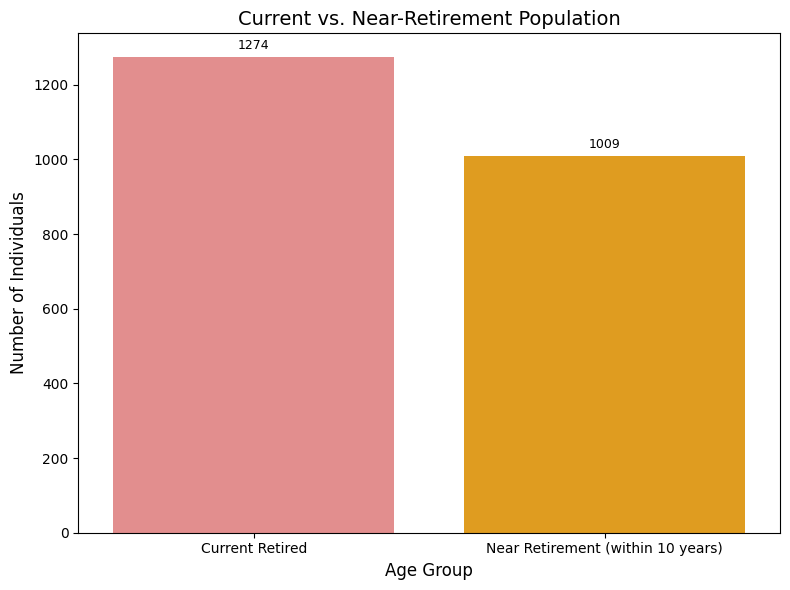

In [ ]:
# Analyze potential increase in retired population

# Define the age threshold for retirement (e.g., 65)
retirement_age_threshold = 65

# Project potential future retired population (simplified approach)
# This is a very basic projection and doesn't account for mortality rates, migration, etc.
# We'll look at the current number of individuals approaching retirement age
years_to_near_retirement = 10  # Consider those within 10 years of retirement

near_retirement_population = census_data[
    (census_data['Age'] >= (retirement_age_threshold - years_to_near_retirement)) &
    (census_data['Age'] < retirement_age_threshold)
]
num_near_retirement = len(near_retirement_population)
total_population = len(census_data)
proportion_near_retirement = (num_near_retirement / total_population) * 100 if total_population > 0 else 0

# Identify the current retired population
current_retired_population = census_data[census_data['Age'] >= retirement_age_threshold]
num_current_retired = len(current_retired_population)
proportion_current_retired = (num_current_retired / total_population) * 100 if total_population > 0 else 0

print("\n--- Potential Future Increase in Retired Population ---")
print(f"Current Retirement Age Threshold: {retirement_age_threshold} years")
print(f"Number of Individuals Within {years_to_near_retirement} Years of Retirement: {num_near_retirement} ({proportion_near_retirement:.2f}% of total population)")
print(f"Current Number of Retired Individuals: {num_current_retired} ({proportion_current_retired:.2f}% of total population)")

# --- Basic Projection and Recommendation ---
if num_near_retirement > num_current_retired:
    print("\nAnalysis suggests a potential increase in the retired population in the coming years.")
    print("Recommendation: The town should proactively plan for a potential increase in demand for end-of-life care services and consider allocating more funding accordingly.")
elif num_near_retirement < num_current_retired:
    print("\nAnalysis suggests the number of individuals nearing retirement is currently lower than the current retired population.")
    print("Recommendation: While a significant immediate increase might not be apparent based on this simple projection, continued monitoring of age demographics is advisable for long-term planning of end-of-life care resources.")
else:
    print("\nAnalysis suggests the number of individuals nearing retirement is similar to the current retired population.")
    print("Recommendation: The town should maintain current levels of end-of-life care funding while closely monitoring age demographics for future trends.")

# --- Visualization (Optional) ---

labels = ['Current Retired', 'Near Retirement (within 10 years)']
counts = [num_current_retired, num_near_retirement]
colors = ['lightcoral', 'orange']

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=counts, palette=colors)
plt.title('Current vs. Near-Retirement Population', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xlabel('Age Group', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, count in enumerate(counts):
    plt.text(i, count + (max(counts) * 0.01), f'{count}', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('retirement_projection.png')
plt.show()

### Insight into Future Retirement Trends (Next 10 Years)
Based on the provided data, we can analyze the potential increase in the retired population in UK over the next 10 years:

#### Current State:

The current retirement age threshold is set at 65 years.
The existing retired population (those aged 65 and above) constitutes 1274 individuals, representing 12.70% of the total population.
Potential Future Trend:

There are 1009 individuals within the dataset who are currently within 10 years of reaching the retirement age (i.e., aged 55 to 64). This group makes up 10.06% of the total population.
Analysis and Implications:

Comparing these two figures, we observe that the number of individuals approaching retirement in the next decade (1009) is lower than the current retired population (1274). This suggests that, based solely on the current age distribution and assuming a constant retirement age of 65, a significant immediate surge in the retired population within the next 10 years is not strongly indicated.

However, it's crucial to consider the following nuances for a more comprehensive understanding:

- **Time Progression**: Over the next 10 years, the current near-retirement cohort will gradually transition into the retired population, while some of the current retired population will, unfortunately, no longer be in that demographic due to mortality.
- **New Individuals Entering Near-Retirement**: Individuals currently younger than 55 will enter the near-retirement age group within this 10-year window. The size of these cohorts will influence the overall trend.
- **Retirement Age Policies in UK**: The official retirement age in UK and any potential future changes to it will significantly impact these projections. As of my last update, the standard retirement age for men is 65, and for women, it is gradually increasing to 65 as part of the AHV 21 reform. Any further policy changes would need to be considered.
- **Other Demographic Factors**: Migration patterns (both into and out of the town) and mortality rates within the near-retirement and retired age groups will also play a role in the actual change in the retired population size.
Conclusion and Recommendation:

Based on this simplified snapshot, while the number of individuals nearing retirement is currently smaller than the existing retired population, the town should not become complacent. It is essential to:

- **Consider Long-Term Projections**: Conduct more sophisticated demographic projections that account for mortality rates, migration, and potential policy changes related to retirement age.
- **Plan Proactively**: Even if a significant immediate increase isn't apparent, the current proportion of both retired and near-retired individuals (over 22% of the population combined) suggests a substantial segment of the population will require age-related services, including end-of-life care, in the coming years. Gradual and thoughtful planning for these needs remains crucial.

/tmp/ipykernel_2061/2995474507.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=colors)


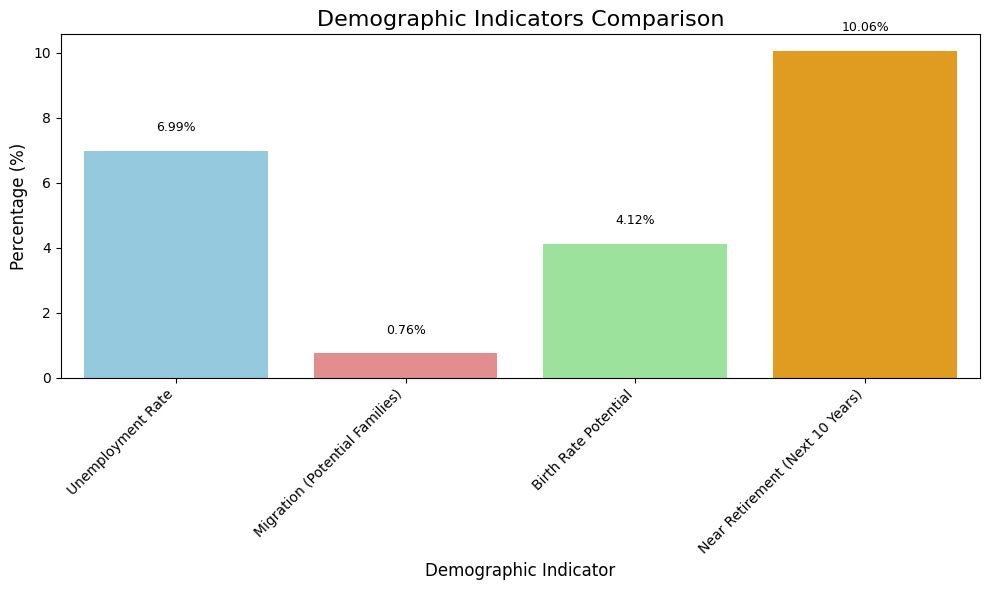

In [ ]:
#  Unemployment Rate (from your provided code) 
unemployed_rate = (census_data['Occupation'] == 'Unemployed').mean() * 100

#  Migration Percentage (using the family proportion as a proxy from your analysis) 
migration_percentage = 0.76  # Proportion of potential migrating families vs. total population

#  Birth Rate Potential (from your analysis) 
birth_rate_potential = 4.12  # Estimated Crude Birth Rate (Infants per potential mother) as a percentage

#  Future Retirement (using the proportion of near-retirement population) 
# Note: This is a proxy for potential future impact, not a direct rate.
# We'll use the percentage of the population nearing retirement.
future_retirement_percentage = 10.06

# Plotting the Comparison 
categories = ['Unemployment Rate', 'Migration (Potential Families)', 'Birth Rate Potential', 'Near Retirement (Next 10 Years)']
values = [unemployed_rate, migration_percentage, birth_rate_potential, future_retirement_percentage]
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values, palette=colors)
plt.title('Demographic Indicators Comparison', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Demographic Indicator', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Annotate the bars with their values
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('demographic_comparison_plot.png')
plt.show()

## Demographic Analysis and Investment Proposal

Based on the comparison of key demographic indicators, we can evaluate the most pressing area for investment in the town.

**Key Demographic Indicators (from the provided image):**

* **Unemployment Rate:** 6.99%
* **Migration (Potential Families):** 0.76%
* **Birth Rate Potential:** 4.12%
* **Near Retirement (Next 10 Years):** **10.06%**

**Analysis of Demographic Trends:**

The comparison of these key indicators reveals that the **largest percentage** among them is the **population nearing retirement in the next 10 years (10.06%)**. This suggests a significant portion of the current population will be entering retirement within the coming decade. While unemployment, migration, and birth rate are important factors, the impending demographic shift towards a larger retired population appears to be the most substantial trend indicated by these figures.

**Evaluation of Investment Options:**

Considering the demographic data presented in the image and the provided investment options:

* **Employment and Training:** The unemployment rate, while present, is not the most significant percentage. Addressing it is important, but it might not be the area with the most immediate and substantial demographic impact based on this comparison.
* **Old Age Care:** The data clearly indicates a substantial proportion of the population will be entering retirement in the next 10 years (10.06%). This suggests a future increase in the demand for services and care associated with an aging population, including end-of-life care.
* **Increase Spending for Schooling:** The birth rate potential suggests a relatively stable growth in the school-aged population, but it is a smaller percentage compared to the near-retirement group.
* **General Infrastructure:** While always important, the provided indicators don't strongly suggest a massive immediate expansion driven by migration or birth rate that would necessitate prioritizing general infrastructure above the needs of a growing elderly population.

### Proposal: Invest in Old Age Care

### Justification for Investing in Old Age Care

Given that the **largest demographic indicator** from the comparison is the **10.06% of the population nearing retirement in the next 10 years**, prioritizing investment in old age care is the most logical and proactive approach for the town:

* **Anticipating Increased Demand:** A significant portion of the population transitioning into retirement will inevitably lead to a greater need for various old age care services, including healthcare, assisted living facilities, and end-of-life care.
* **Addressing a Significant Demographic Shift:** By focusing on old age care, the town can prepare for a substantial demographic change that is clearly indicated by the data.
* **Ensuring Resident Well-being:** Investing in adequate old age care ensures the well-being and quality of life for a growing segment of the community.
* **Long-Term Planning and Stability:** Proactive investment in this area will allow the town to develop the necessary infrastructure, services, and trained personnel to meet the future needs of its aging population, contributing to long-term stability and social responsibility.

While the other demographic indicators are relevant, the data most strongly points towards a significant increase in the retired population in the coming years. Therefore, allocating resources towards old age care is the most prudent and data-driven investment to address the most prominent future demographic shift.